### Linear Regression
#### Predicting Excitation Current in Synchronous Machines

Load Dataset

In [1]:
import pandas as pd

# Load the dataset
df_data = pd.read_csv('../datasets/synchronous machine.csv', delimiter=";", decimal=",")

# Extract input features and target variable
X = df_data[['I_y', 'PF', 'e_PF', 'd_if']].values
y = df_data['I_f'].values

Observe Dataset Statistical Summary

In [2]:
df_data.describe()

,I_y,PF,e_PF,d_if,I_f
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,4.499820,0.825296,0.174704,0.350659,1.530659
std,0.896024,0.103925,0.103925,0.180566,0.180566
min,3.000000,0.650000,0.000000,0.037000,1.217000
25%,3.700000,0.740000,0.080000,0.189000,1.369000
50%,4.500000,0.820000,0.180000,0.345000,1.525000
75%,5.300000,0.920000,0.260000,0.486000,1.666000
max,6.000000,1.000000,0.350000,0.769000,1.949000


Boxplot Analysis

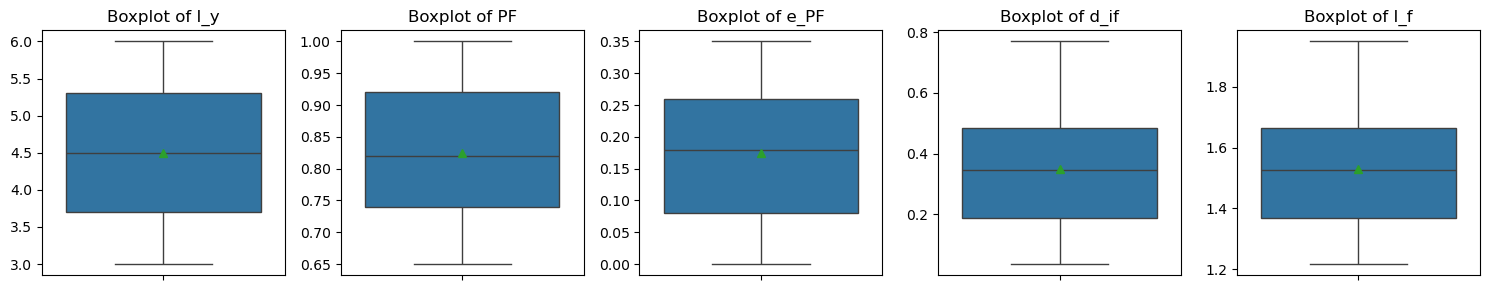

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature list
x_feature_names = ['I_y', 'PF', 'e_PF', 'd_if', 'I_f']

# Create a 1×5 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Plot each feature in a separate boxplot
for i, feature in enumerate(x_feature_names):
    col = i % 5
    # Create boxplot using seaborn
    sns.boxplot(y=df_data[feature], ax=axes[col], showmeans=True)
    axes[col].set_title(f'Boxplot of {feature}')  # Set title
    axes[col].set_ylabel('')                      # Set y-axis label to empty

# Set spacing between subplots
plt.tight_layout()
plt.show()

Splitting Dataset into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of training set X:', X_train.shape)
print('Shape of testing set X:', X_test.shape)


Shape of training set X: (389, 4)
Shape of testing set X: (168, 4)


Feature Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalization using MinMax scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build a Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

# Create linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict using the model
y_pred = linear_model.predict(X_test)

Evaluate Training Results

In [12]:
from sklearn.metrics import mean_squared_error

# Evaluate performance on training set
print("Training set")
y_train_pred = linear_model.predict(X_train)
print("R2 Score: ", linear_model.score(X_train, y_train))
print("MSE: ", mean_squared_error(y_train, y_train_pred))

# Evaluate performance on testing set
print("Test set")
y_test_pred = linear_model.predict(X_test)
print("R2 Score: ", linear_model.score(X_test, y_test))
print("MSE: ", mean_squared_error(y_test, y_test_pred))


Training set
R2 Score:  1.0
MSE:  2.6489705846913795e-32
Test set
R2 Score:  1.0
MSE:  2.4358428249011898e-32


Validate Model Predictions on Test Set

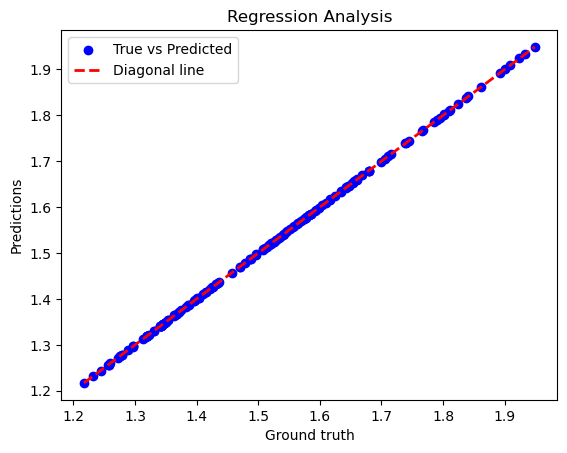

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Draw scatter plot
plt.scatter(y_test, y_test_pred, color='blue', label='True vs Predicted')

# Draw diagonal reference line
max_val = max(np.max(y_test), np.max(y_test_pred))
min_val = min(np.min(y_test), np.min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Diagonal line')

# Set plot title and axis labels
plt.title('Regression Analysis')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')

# Add legend
plt.legend()
plt.show()


Regression Coefficient Analysis

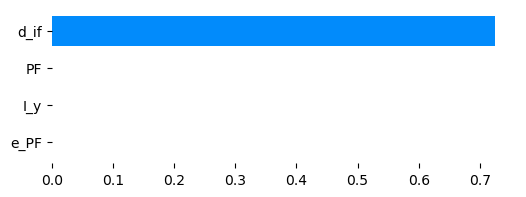

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Create an empty DataFrame
df = pd.DataFrame()

# Store the absolute values of model coefficients in 'coef' column
df['coef'] = np.abs(linear_model.coef_)

# Define feature names and store in 'feature' column
df['feature'] = ['I_y', 'PF', 'e_PF', 'd_if']

# Sort coefficients in ascending order
df_sorted = df.sort_values('coef', ascending=True)

# Set figure size
plt.figure(figsize=(6, 2))

# Draw horizontal bar chart; set bar color to blue
plt.barh(df_sorted['feature'], df_sorted['coef'], color='#028bfb')

# Remove box border
plt.box(False)
plt.show()
